# Plot prediction and ground truth

In [1]:
import numpy as np
import pandas as pd
import respiration.utils as utils

signals_dir = utils.dir_path('outputs', 'signals')
predictions_file = utils.join_paths(signals_dir, 'transformer_predictions.csv')

predictions = pd.read_csv(predictions_file)
predictions['signal'] = predictions['signal'].apply(eval).apply(np.array)
predictions.head()

,subject,setting,model,signal
0,Proband21,303_normalized_face,20240710_142159,"[-0.023982403799891472, -0.023851005360484123,..."
1,Proband22,303_normalized_face,20240710_142159,"[-0.023859316483139992, -0.021364865824580193,..."
2,Proband23,303_normalized_face,20240710_142159,"[0.029018523171544075, 0.02900373749434948, 0...."
3,Proband24,303_normalized_face,20240710_142159,"[0.010098813101649284, 0.009706074371933937, 0..."
4,Proband25,303_normalized_face,20240710_142159,"[-0.01839650236070156, -0.013670293614268303, ..."


In [2]:
from respiration.dataset import VitalCamSet

dataset = VitalCamSet()

In [6]:
subject = 'Proband21'
model = '20240710_220756'

prediction = predictions[
    (predictions['model'] == model) &
    (predictions['subject'] == subject)]

signal = prediction['signal'].values[0]
sampling_rate = 30

gt_signal = dataset.get_breathing_signal(subject, '101_natural_lighting')
gt_signal = gt_signal[:len(signal)]

gt_signal.shape, signal.shape

((3600,), (3600,))

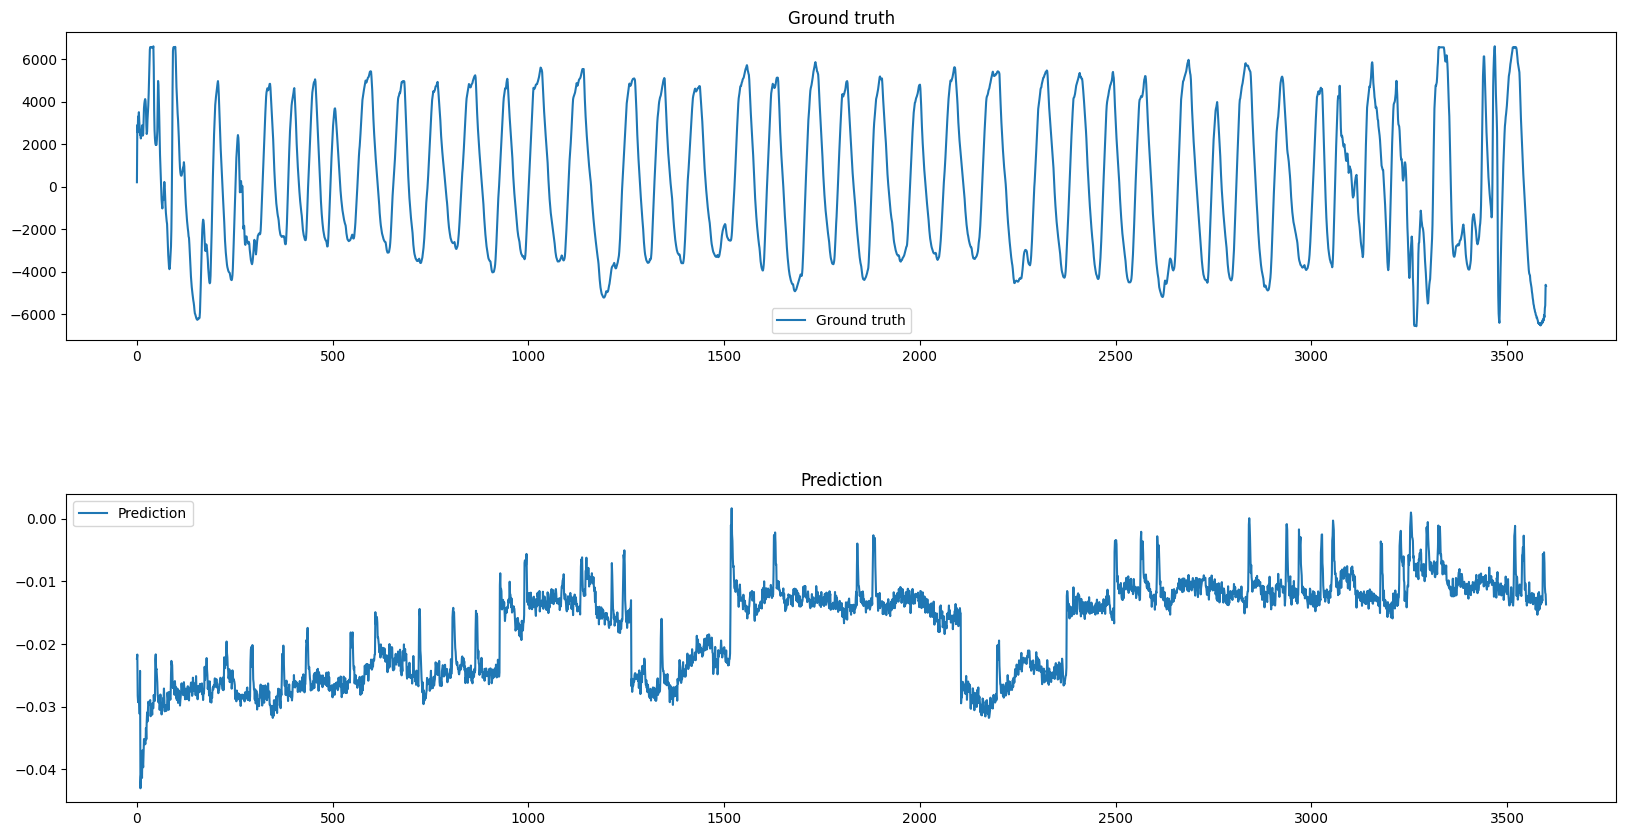

In [7]:
import matplotlib.pyplot as plt

# Plot the raw signals in two separate figures
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# Add some space between the two figures
plt.subplots_adjust(hspace=0.5)

axs[0].plot(gt_signal, label='Ground truth')
axs[0].set_title('Ground truth')
axs[0].legend()

axs[1].plot(signal, label='Prediction')
axs[1].set_title('Prediction')
axs[1].legend()

In [8]:
import respiration.analysis as analysis

compare = analysis.SignalComparator(signal, gt_signal, sampling_rate)
compare.errors()

AttributeError: module 'respiration.analysis.analysis' has no attribute 'SignalComparator'

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(compare.ground_truth, label='Ground truth')
plt.plot(compare.prediction, label='Prediction')
plt.legend()
plt.show()

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

random_signal = np.random.rand(len(compare.ground_truth))

compare2 = analysis.SignalComparator(
    signal,
    gt_signal,
    sampling_rate,
)

s1 = compare2.ground_truth
s2 = compare2.prediction

d, paths = dtw.warping_paths(s1, s2, use_c=True)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)